# Feature Engineering

### (1) Import Modules

In [1]:
import pandas as pd
import numpy as np

from TockFormer.Utility.factorFactory import FactorFactory
import matplotlib.pyplot as plt

from TockFormer.Utility.registry import FACTOR_REGISTRY

/Users/ziwenchen/miniconda3/envs/BeatBuynHold/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### (2) Load Data

In [2]:
data = pd.read_csv("Data/SPY_2020-07-01_2021-07-01_minute.csv")
data = data.head(1000)

### (3) Feature Engineering

In [3]:
# 初始化 FactorFactory，指定 forward_period=5 minute、仅保留前10个因子
ff = FactorFactory(data, forward_period=5, window=60, scaler='abs_minmax', top_k=100)
print("factor factory initialized。base columns：", ff.base_cols)
print("forward_period parameter：", ff._eval_kwargs['forward_period'], "minutes")

IO Dump: 100%|██████████| 17/17 [00:00<00:00, 2111.44it/s]
IO Dump: 0it [00:00, ?it/s]

factor factory initialized。base columns： ['open', 'high', 'low', 'close', 'volume', 'dollar_volume', 'tick_count', 'trade_size_mean', 'trade_size_std', 'zero_return_count', 'price_direction_ratio', 'large_trade_count', 'large_trade_volume', 'vwap', 'large_trade_ratio', 'large_trade_volume_ratio']
forward_period parameter： 5 minutes


In [4]:
ff.generate_factors(mode='thread', bounded_only=True)

IO Wash:  11%|█         | 2814/26096 [00:02<00:22, 1055.44it/s, dropped=8]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IO Wash:  22%|██▏       | 5659/26096 [00:04<00:18, 1107.91it/s, dropped=22]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IO Wash:  28%|██▊       | 7390/26096 [00:06<00:12, 1495.69it/s, dropped=30]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change 

In [5]:
ff.get_summary()

,spearman_ic,pearson_ir,spearman_ic_norm,pearson_ir_norm,combined_score,pca_coeff,pca_coeff_norm
bbpband_20_2.0_(high)_minus_bbpband_10_2.0_(open),-0.115767,-0.937855,0.867555,0.831208,2.543677,0.103960,0.844914
bbpband_10_2.0_(low)_minus_bbpband_20_2.0_(high),0.121171,0.817474,0.908055,0.724515,2.486250,0.105037,0.853680
bbpband_20_1.5_(high)_minus_bbpband_10_2.0_(low),-0.111038,-0.864616,0.832114,0.766297,2.443325,0.103960,0.844914
bbpband_10_1.5_(open)_minus_bbpband_20_1.5_(high),0.115767,0.937855,0.867555,0.831208,2.387723,0.084801,0.688960
bbpband_20_1.5_(close)_minus_bbpband_10_1.5_(low),-0.098501,-0.868390,0.738161,0.769642,2.361483,0.105037,0.853680
...,...,...,...,...,...,...,...
sin_(rsi_6_(large_trade_ratio)),-0.125057,-0.606445,0.937177,0.537484,1.737505,0.032452,0.262844
bbpband_10_1.5_(close)_minus_rsi_14_(high),0.052706,1.054113,0.394974,0.934245,1.723861,0.048644,0.394642
bbpband_10_2.0_(low)_minus_bbpband_20_1.5_(close),0.079831,0.887243,0.598250,0.786351,1.722524,0.041676,0.337923
rsi_14_(high)_minus_bbpband_20_1.5_(open),-0.051690,-1.054662,0.387363,0.934732,1.716737,0.048644,0.394642


In [8]:
cluster_df = ff.evaluate_clusterings(algos=['KMeans','GaussianMixture'],
                                          metrics=['silhouette'],
                                          seq_len=50
                                     )
print(cluster_df[['algo','n_clusters','silhouette']].head(8))

KeyError: 'timestamp'

🔄 窗口展平: 100%|██████████| 951/951 [00:00<00:00, 175787.01it/s]
/Users/ziwenchen/miniconda3/envs/BeatBuynHold/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
🔄 并行降维: 100%|██████████| 6/6 [00:14<00:00,  2.45s/it]


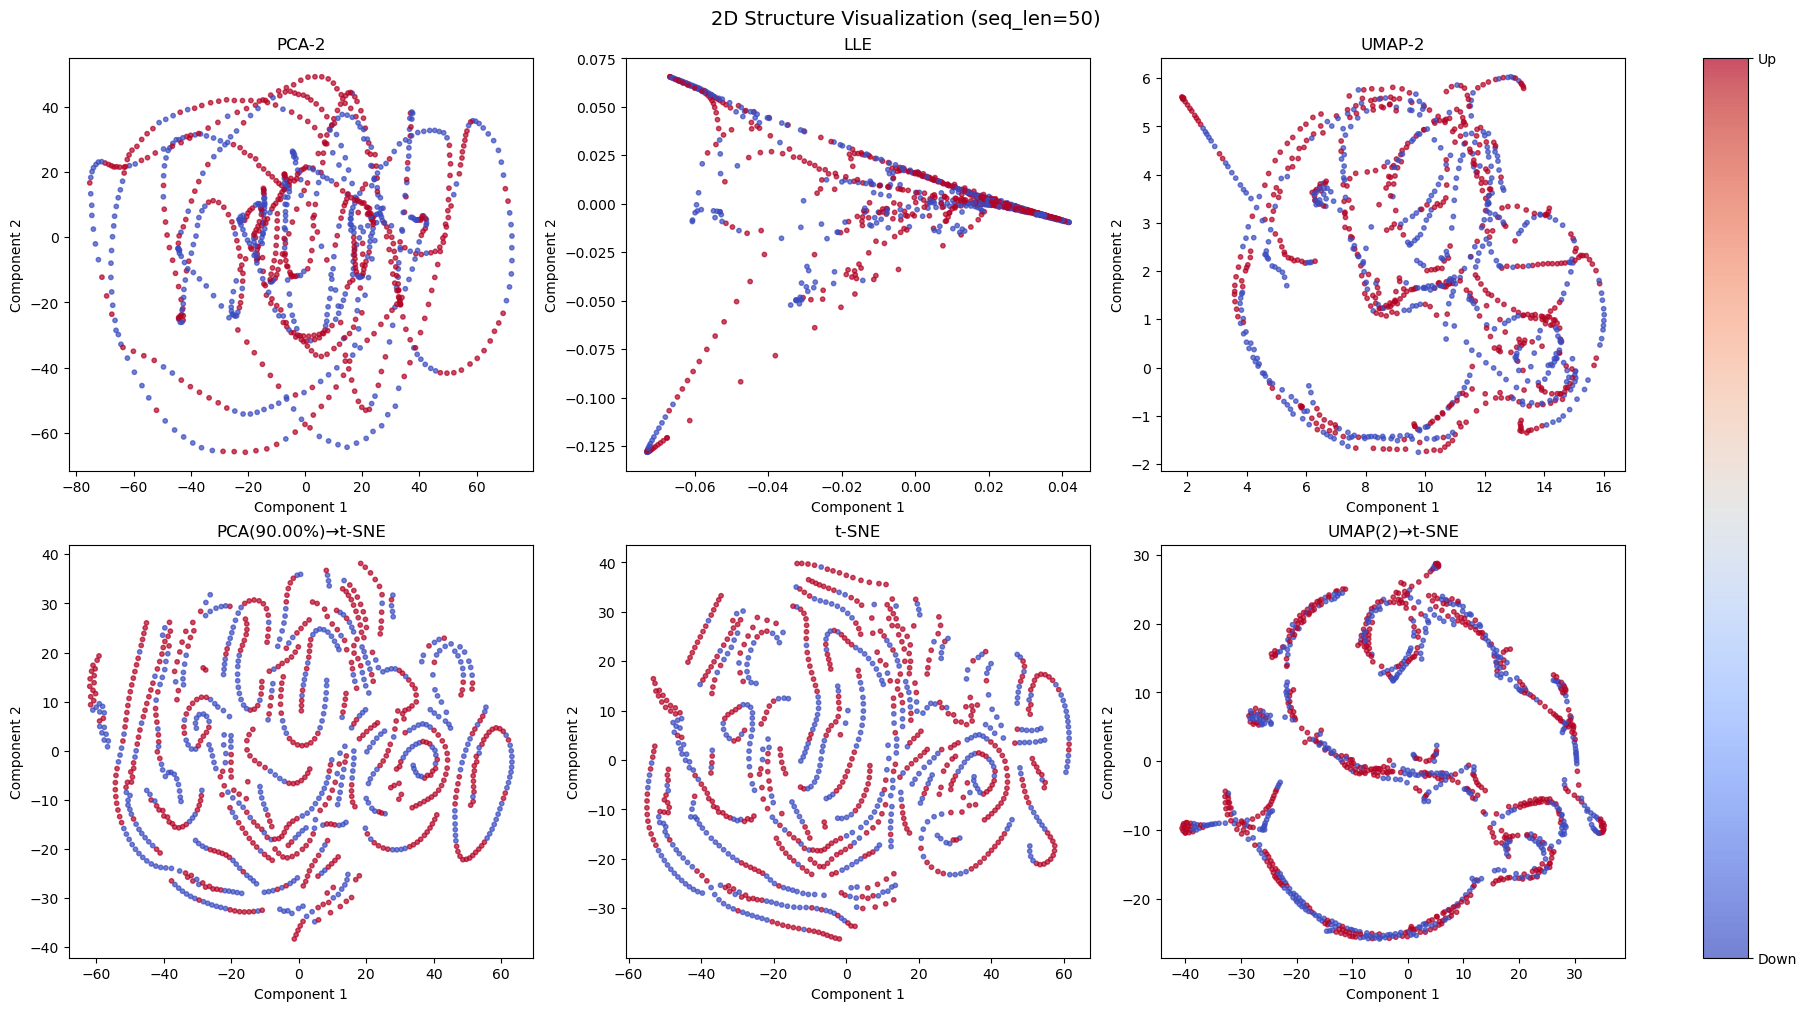

In [6]:
ff.visualize_structure_2d(
    seq_len=50
)